In [1]:
# ## Note: restart after running this cell

# ! pip install plotly --upgrade
# ! pip install pmdarima

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 5000)

data = pd.read_csv('new_nifty_50.csv')
display(data.head())

data = data[data['symbol'] == 'APSE.NS']
data['datetime'] = pd.to_datetime(data['datetime'])

data = data.set_index('datetime').asfreq('d')
data = data.sort_index()

data.drop(columns=['ric_key', 'symbol'], inplace=True)
data.dropna(inplace=True)
data['close_target'] = data['close'].shift(-1)
data.dropna(inplace=True)



,datetime,open,high,low,close,volume,symbol,ric_key
0,2012-01-17,137.50,141.00,135.00,140.00,1636196.0,APSE.NS,25
1,2012-01-18,142.00,143.80,138.70,141.70,890591.0,APSE.NS,25
2,2012-01-19,144.00,150.55,143.15,149.40,1456077.0,APSE.NS,25
3,2012-01-20,152.15,157.60,150.30,155.40,1634070.0,APSE.NS,25
4,2012-01-23,155.40,155.40,145.80,146.75,1657609.0,APSE.NS,25


In [3]:
data.head()

,open,high,low,close,volume,close_target
datetime,,,,,,
2012-01-17,137.50,141.00,135.00,140.00,1636196.0,141.70
2012-01-18,142.00,143.80,138.70,141.70,890591.0,149.40
2012-01-19,144.00,150.55,143.15,149.40,1456077.0,155.40
2012-01-20,152.15,157.60,150.30,155.40,1634070.0,146.75
2012-01-23,155.40,155.40,145.80,146.75,1657609.0,150.05


In [4]:
# bulk = pd.read_csv('bulk-2019-2021.csv')

def bulk_preprocessing(bulk_list, bulk_original=False):
    
    
    
    if len(bulk_list) > 1:
        
        bulk_original = bulk_original.copy()

        for i in range(len(bulk_list)):
            bulk = pd.read_csv('{}'.format(bulk_list[i]))
            
            bulk = bulk[bulk['Security Name'] == 'Reliance Indl Infra Ltd']

            bulk.set_index('Date', inplace=True)
            bulk.index = pd.to_datetime(bulk.index)
            bulk = bulk.sort_index()
            bulk['bulk'] = bulk['Trade Price / Wght. Avg. Price'].values
            bulk.drop(columns=['Trade Price / Wght. Avg. Price'], inplace=True)
            bulk.rename(columns={'Client Name': 'Investor Name'}, inplace=True)
            
            bulk['Quantity Traded ']=bulk['Quantity Traded '].str.replace(',','')
            bulk['Quantity Traded '] = bulk['Quantity Traded '].astype(float)
            
            bulk_original = bulk_original.append(bulk)
            
        bulk_original = bulk_original.sort_index()
        return bulk_original
            
    else: 
        
        bulk = pd.read_csv('{}'.format(bulk_list[0]))

        bulk = bulk[bulk['Security Name'] == 'Reliance Indl Infra Ltd']

        bulk.set_index('Date', inplace=True)
        bulk.index = pd.to_datetime(bulk.index)
        bulk = bulk.sort_index()
        bulk['bulk'] = bulk['Trade Price / Wght. Avg. Price'].values
        bulk.drop(columns=['Trade Price / Wght. Avg. Price'], inplace=True)
        bulk['Quantity Traded ']=bulk['Quantity Traded '].str.replace(',','')
        bulk['Quantity Traded '] = bulk['Quantity Traded '].astype(float)
        
        display(bulk.head())
        
        return bulk 
    

In [5]:
bulk1 = bulk_preprocessing(['bulk-2019-2021.csv'])
bulk2 = bulk_preprocessing(['2015_bulk.csv','2016_bulk.csv','2017_bulk.csv','2018_bulk.csv'], bulk_original=bulk1)

bulk2 = bulk2[bulk2.index < '2019']
bulk = bulk2.append(bulk1)

,Symbol,Security Name,Investor Name,Buy / Sell,Quantity Traded,Remarks,bulk
Date,,,,,,,
2019-01-02,RIIL,Reliance Indl Infra Ltd,BERKELEY SECURITIES LIMITED,BUY,112198.0,-,349.30
2019-01-02,RIIL,Reliance Indl Infra Ltd,BERKELEY SECURITIES LIMITED,SELL,112198.0,-,348.60
2019-01-08,RIIL,Reliance Indl Infra Ltd,BERKELEY SECURITIES LIMITED,BUY,83695.0,-,341.48
2019-01-08,RIIL,Reliance Indl Infra Ltd,BERKELEY SECURITIES LIMITED,SELL,83695.0,-,342.11
2019-01-18,RIIL,Reliance Indl Infra Ltd,BERKELEY SECURITIES LIMITED,BUY,81859.0,-,337.83


#### Order of transactions are important. In other words, the generation of signals is tick-based, not time-based

We have to confirm that this is available basis and that it is shown in the according order. 

In [6]:
# bulk_diff = bulk.copy()
# # bulk_diff['Quantity Traded '] = bulk_diff['Quantity Traded '].diff(1)

# fig, ax = plt.subplots(figsize=(13, 5))
                       
# #ax.plot(bulk_diff['Quantity Traded '].rolling(15).mean(), color='b')
# ax.plot(bulk_diff['Quantity Traded '].diff().rolling(15).mean(), color='g')
# #ax.axhline(y=130000)

In [7]:
bulk_diff1 = bulk.copy()
bulk_diff1.head()

,Symbol,Security Name,Investor Name,Buy / Sell,Quantity Traded,Remarks,bulk
Date,,,,,,,
2015-08-12,RIIL,Reliance Indl Infra Ltd,F6 FINSERVE PRIVATE LIMITED,SELL,83565.0,-,374.49
2015-08-12,RIIL,Reliance Indl Infra Ltd,F6 FINSERVE PRIVATE LIMITED,BUY,83565.0,-,374.99
2015-12-22,RIIL,Reliance Indl Infra Ltd,YUGA STOCKS AND COMMODITIES PRIVATE LIMITED,SELL,111515.0,-,396.87
2015-12-22,RIIL,Reliance Indl Infra Ltd,PARIKH NIRMALABEN SURESHBHAI,BUY,84129.0,-,403.30
2015-12-22,RIIL,Reliance Indl Infra Ltd,PARIKH NIRMALABEN SURESHBHAI,SELL,34129.0,-,404.68


616

308

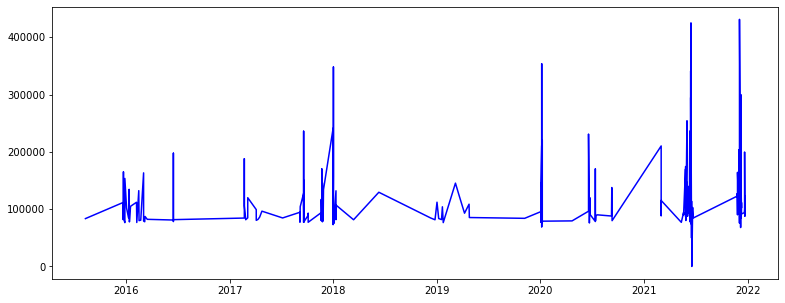

In [8]:
bulk_diff1 = bulk.copy()
bulk_diff1.reset_index(inplace=True)
bulk_diff1.drop_duplicates(['Date', 'Investor Name'], inplace=True)
bulk_diff1.set_index('Date', inplace=True)



bulk_diff2 = bulk.copy()
display(len(bulk_diff2), len(bulk_diff1))
# bulk_diff['Quantity Traded '] = bulk_diff['Quantity Traded '].diff(1)

fig, ax = plt.subplots(figsize=(13, 5))

#bulk_diff1['Quantity Traded '] = bulk_diff1['Quantity Traded '].rolling(5).mean() - bulk_diff1['Quantity Traded '].rolling(10).mean()
                       
ax.plot(bulk_diff1['Quantity Traded '], color='b')
#ax.plot(bulk_diff2['Quantity Traded '], color='g')
#ax.axhline(y=130000)

In [9]:
bulk

,Symbol,Security Name,Investor Name,Buy / Sell,Quantity Traded,Remarks,bulk
Date,,,,,,,
2015-08-12,RIIL,Reliance Indl Infra Ltd,F6 FINSERVE PRIVATE LIMITED,SELL,83565.0,-,374.49
2015-08-12,RIIL,Reliance Indl Infra Ltd,F6 FINSERVE PRIVATE LIMITED,BUY,83565.0,-,374.99
2015-12-22,RIIL,Reliance Indl Infra Ltd,YUGA STOCKS AND COMMODITIES PRIVATE LIMITED,SELL,111515.0,-,396.87
2015-12-22,RIIL,Reliance Indl Infra Ltd,PARIKH NIRMALABEN SURESHBHAI,BUY,84129.0,-,403.30
2015-12-22,RIIL,Reliance Indl Infra Ltd,PARIKH NIRMALABEN SURESHBHAI,SELL,34129.0,-,404.68
2015-12-22,RIIL,Reliance Indl Infra Ltd,YUGA STOCKS AND COMMODITIES PRIVATE LIMITED,BUY,111505.0,-,393.30
2015-12-23,RIIL,Reliance Indl Infra Ltd,N.K. SECURITIES,BUY,81843.0,-,423.31
2015-12-23,RIIL,Reliance Indl Infra Ltd,N.K. SECURITIES,SELL,81843.0,-,423.64
2015-12-24,RIIL,Reliance Indl Infra Ltd,GENUINE STOCK BROKERS PVT LTD,SELL,102292.0,-,467.21


In [2]:
from nsepy import get_history

from datetime import date

VIX = get_history(symbol="INDIA VIX", start=date(2016,1,1),end=date(2021,12,31), index=True)


['open', 'high', 'low', 'close', 'volume', 'VIX']

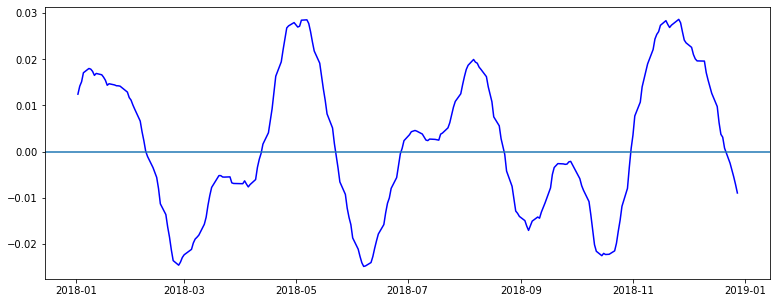

In [3]:
### Vix

VIX1 = VIX.copy()
VIX1.index = pd.to_datetime(VIX1.index)
VIX1.rename(columns={'Close':'VIX'}, inplace=True)

VIX1 = VIX1.diff()
VIX1 = VIX1.rolling(30).mean()

VIX1['VIX'] = VIX1['VIX'].rolling(20).mean() - VIX1['VIX'].rolling(30).mean() 


### Reli data 
data_anal = data.copy()

data_anal = data_anal.merge(VIX1, left_index=True, right_index=True)
data_anal.drop(columns=['Open', 'High', 'Low', 'Volume', 'Turnover'], inplace=True)

# data_anal['close'] = data_anal['close'].diff()
columns = list(data_anal.columns)
columns.remove('close_target')
display(columns)

data_anal[columns] = data_anal[columns].diff()

data_anal[columns] = data_anal[columns].rolling(20).mean()
data_anal['close'] = data_anal['close'].rolling(15).mean() - data_anal['close'].rolling(30).mean()

data_anal['combined'] = (data_anal['close']/50) + (data_anal['VIX'])

data_anal.dropna(inplace=True)


fig, ax = plt.subplots(figsize=(13, 5))
                       

ax.plot(data_anal['combined']['2018'], color='b')
ax.axhline(y=0)

#display((data_anal['VIX']['2020':]).plot(figsize=(10,5)))
#display(data_anal['combined']['2019'].plot(figsize=(10,5)))

<AxesSubplot:>

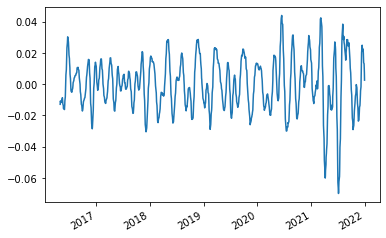

In [9]:
data_anal['combined'].plot()

<AxesSubplot:>

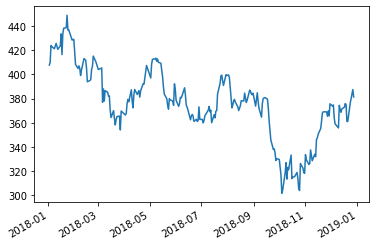

In [5]:
data_anal['close_target']['2018'].plot()

In [6]:
def momentum_indicator_vix(data, long_threshold, short_threshold, long_ma, short_ma, plot=False):
    
    # Position signals 1 if the MA crossover indicates long, -1 if short, 0 when liquidating positions
    position = []
    
    # Value required for initialization
    history = []
    
    # Used for waiting the next opposite signal when liquidating a position. 
    # Example: if a long position gets liquidated, wait for a short signal to re-enter the strategy
    wait_signal = []
    data_anal = data.copy()
    
    long_threshold  = long_threshold
    short_threshold = short_threshold
    data_anal['long_ma'] = data['combined'].rolling(long_ma).mean()
    data_anal['short_ma'] = data['combined'].rolling(short_ma).mean()
    
    for i in range(len(data_anal)):
        
        #################### Initialization #########################
        if len(history) < 1:
            
            # Position short if short MA crosses Long MA from above
            if data_anal['combined'][i] >= short_threshold:
                position.append(-1)
                history.append(1)
            
            # Position Long if short MA crosses Long MA from below
            elif data_anal['combined'][i] <= long_threshold:
                position.append(1)
                history.append(1)
            
            
            # Continue neutral if none of the above applies
            else:
                position.append(0)
                
        #################### Long Rules #########################
        elif (position[-1] == 1) and (len(history) >= 1):
            
            # Once position is long, go short if short MA crosses Long MA from above
            if data_anal['combined'][i] > short_threshold: 
                position.append(-1)
            
#             # Once position is long, liquidate position if current value violates the stop-loss percentage threshold
#             elif data_anal['Adj Close'].iloc[i] < (data_anal['Adj Close'].iloc[i-1] * (1 - stop_loss)):
#                 position.append(0)
                
#                 # Set wait signal to positive to wait for the short signal
#                 wait_signal.append(1)

            elif data_anal['combined'][i] < data_anal['short_ma'][i]:
                position.append(-1)
            
            # Continue long if none of the above applies
            else:
                position.append(1)
                
        #################### Short Rules #########################        
        elif (position[-1] == -1) and (len(history) >= 1):
            
            # Once position is short, go long if short MA crosses Long MA from below
            if data_anal['combined'][i] < long_threshold: 
                position.append(1)
            
#             # Once position is short, liquidate position if current value violates the stop-loss percentage threshold
#             elif data_anal['Adj Close'].iloc[i] > (data_anal['Adj Close'].iloc[i-1] * (1 + stop_loss)):
#                 position.append(0)
                
#                 # Set wait signal to negative to wait for the long signal
#                 wait_signal.append(-1)

            elif data_anal['combined'][i] > data_anal['long_ma'][i]:
                position.append(1)
            
            # Continue short if none of the above applies
            else:
                position.append(-1)
        
#         ######## Re-enter strategy after stop-loss liquidation ########
#         elif (position[-1] == 0) and (len(history) >= 1):
            
#             # Wait for long signal
#             if wait_signal[-1] == -1:
#                 if data_anal['ma_long'].iloc[i] < data_anal['ma_short'].iloc[i]:
#                     position.append(1)
#                 else:
#                     position.append(0)
                    
#             # Wait for short signal
#             elif wait_signal[-1] == 1:
#                 if data_anal['ma_long'].iloc[i] > data_anal['ma_short'].iloc[i]:
#                     position.append(-1)
#                 else:
#                     position.append(0)
                    
#             # Break strategy if stop-loss shows an unexpected value
#             else:
#                 print('Something is wrong - Stop Loss')
#                 break
                
        ######## Break strategy if something goes unexpected ########
        else: 
            print('Something is wrong')
            break
    
    # Add strategy's signal to the data_analframe
    data_anal['signals'] = position
    
    # Plotting
    if plot == True:
        #data_anal = data_anal['2018']
        data_anal['signal change'] = data_anal['signals'].eq(data_anal['signals'].shift(1))  # False when current value and previous value are different
        #data_anal['indicator'] = data_anal['ma_short'] - data_anal['ma_long'] # Plot difference between long/short MA 
        
        # Buy and sell dates positioning 
        buy_dates = data_anal[(data_anal['signals'] == 1) & (data_anal['signal change'] == False)] 
        sell_dates = data_anal[(data_anal['signals'] == -1) & (data_anal['signal change'] == False)] 

        
        fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(25, 20))
        
        # Add buy and sell enter pinpoints to plot
        ax[0].plot(buy_dates.index, buy_dates['close_target'], '^', color='green', markersize=10, label='Buy Dates')
        ax[0].plot(sell_dates.index, sell_dates['close_target'], 'v', color='red', markersize=10, label='Sell Dates')

        
        # Plot signals on top of the adjusted close
        ax[0].plot(data_anal.index, data_anal['close_target'], color='blue', label='SPY Adj Close')
#         ax[0].plot(data_anal.index, data_anal['ma_short'], color='green', label='Short MA')
#         ax[0].plot(data_anal.index, data_anal['ma_long'], color='red', label='Long MA')
        ax[0].title.set_text('SPY and MA crossover')
        
        ax[0].legend(loc="upper left")
        
        # Second plor with buy and sell dates on top of the indicator (difference between long and short MA)
        ax[1].plot(buy_dates.index, buy_dates['combined'], '^', color='green', markersize=10, label='Buy Dates')
        ax[1].plot(sell_dates.index, sell_dates['combined'], 'v', color='red', markersize=10, label='Sell Dates')
        ax[1].plot(data_anal.index, data_anal['combined'], color='blue', label= 'Momentum Indicator')
        ax[1].title.set_text('Momentum Indicator')
        ax[1].legend(loc="upper left")
        ax[1].axhline(y=long_threshold)
        ax[1].axhline(y=short_threshold)
        
#         # horizontal line in the 0 value
#         ax[1].axhline(y=0)
        plt.show()
    return data_anal

In [155]:
data_anal.head()

,open,high,low,close,volume,close_target,VIX,combined
2016-05-02,-0.1500,-0.5625,-0.4100,-0.843917,-28561.15,235.50,0.004004,-0.012874
2016-05-03,-0.5925,-0.3900,-0.5000,-0.764250,56804.70,208.25,0.004239,-0.011046
2016-05-04,-0.6750,-0.6750,-1.6975,-0.752500,1056566.65,198.00,0.004362,-0.010687
2016-05-05,-1.9900,-1.9700,-2.2100,-0.796750,761930.70,194.55,0.004523,-0.011412
2016-05-06,-2.2200,-2.1550,-1.6675,-0.805000,540297.10,196.75,0.004325,-0.011775


In [7]:
def momentum_vix_optimizer(df, init_capital, short_range, long_range, long_ma_range, short_ma_range):
    '''This function finds optimal value for MA crossover strategy
    
    df: OHLC dataset with Adjusted Close. Index should be datetime format
    
    ma_short: range of windows for the daily moving average for short MA
    
    ma_long: range of windows for the daily moving average for long MA
    
    stop_loss: range of percentage values for the stop loss
    
    ema: True to use Exponential Moving Average instead of Simple Moving Average'''
    data = df.copy()
    
    # Compute daily returns of the SPY
    data['target_returns'] = data['close_target'].pct_change()
    display(data.head())
    
    # Cummulative return of SPY
    data['buy_and_hold_strat'] = init_capital  * (1 + data['target_returns']).cumprod()
    
    
    return_list = []
    for s in short_range:
        print('Calculating Short {}-MA'.format(s))
        for l in long_range:
            
            # Execute if short MA is lower than long MA
            if s > l:
                for l_ma in long_ma_range:
                    for s_ma in short_ma_range:
                        temp_strat = momentum_indicator_vix(data, short_threshold=s, 
                                                            long_threshold=l, long_ma=l_ma, short_ma=s_ma, plot=False)

                        # Copy daily return of the SPY
                        temp_strat['target_returns'] = data['target_returns'].values

                        # Compute daily returns and cummulative returns of the MA crossover strategy
                        ############# Note: the shift of the signals is crucial to avoid look-ahead bias ###########
                        temp_strat['m_strat_returns'] = data['target_returns'] * temp_strat['signals']
                        temp_strat['m_strat_cumsum'] = init_capital * (1 + temp_strat['m_strat_returns']).cumprod()

                        # Store parameters with final value of the cummulative return
                        return_list.append([s, l , l_ma, s_ma, temp_strat['m_strat_cumsum'].iloc[-1]])

            else: 
                pass
    
    # Convert values stored on the return_list to dataframe
    opt_df = pd.DataFrame(return_list, columns=['short_thres', 'long_thres', 'long_ma', 'short_ma', 'Final Return'])
    
    # Sort values to extract the top 5 combination of parameters with best performance based on final value of cummulative return
    opt_df = opt_df.sort_values(by=['Final Return'], ascending=False)
    opt_df = opt_df.iloc[:5,:]
    
    return opt_df, data
                
    
strat_opt, b_h = momentum_vix_optimizer(df = data_anal, 
                                  init_capital = 10000, 
                                  short_range = np.arange(0, 0.05, 0.005), 
                                  long_range = np.arange(0, -0.05, -0.005),
                                  long_ma_range = np.arange(1, 10, 2),
                                  short_ma_range = np.arange(1, 10, 2))

,open,high,low,close,volume,close_target,VIX,combined,target_returns
2016-05-02,-0.1500,-0.5625,-0.4100,-0.843917,-28561.15,235.50,0.004004,-0.012874,NaN
2016-05-03,-0.5925,-0.3900,-0.5000,-0.764250,56804.70,208.25,0.004239,-0.011046,-0.115711
2016-05-04,-0.6750,-0.6750,-1.6975,-0.752500,1056566.65,198.00,0.004362,-0.010687,-0.049220
2016-05-05,-1.9900,-1.9700,-2.2100,-0.796750,761930.70,194.55,0.004523,-0.011412,-0.017424
2016-05-06,-2.2200,-2.1550,-1.6675,-0.805000,540297.10,196.75,0.004325,-0.011775,0.011308


Calculating Short 0.0-MA
Calculating Short 0.005-MA


KeyboardInterrupt: 

In [157]:
strat_opt.head()

,short_thres,long_thres,long_ma,short_ma,Final Return
5795,0.018,-0.014,9,1,60384.116150
5820,0.018,-0.016,9,1,52485.607644
11405,0.036,-0.014,3,1,52118.413737
12035,0.038,-0.014,5,1,51573.897617
12030,0.038,-0.014,3,1,50699.354036


<AxesSubplot:>

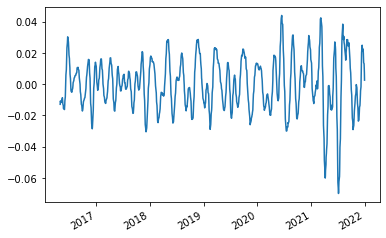

In [158]:
data_anal['combined'].plot()

In [159]:
data.head()

,open,high,low,close,volume,close_target
datetime,,,,,,
2012-01-17,137.50,141.00,135.00,140.00,1636196.0,141.70
2012-01-18,142.00,143.80,138.70,141.70,890591.0,149.40
2012-01-19,144.00,150.55,143.15,149.40,1456077.0,155.40
2012-01-20,152.15,157.60,150.30,155.40,1634070.0,146.75
2012-01-23,155.40,155.40,145.80,146.75,1657609.0,150.05


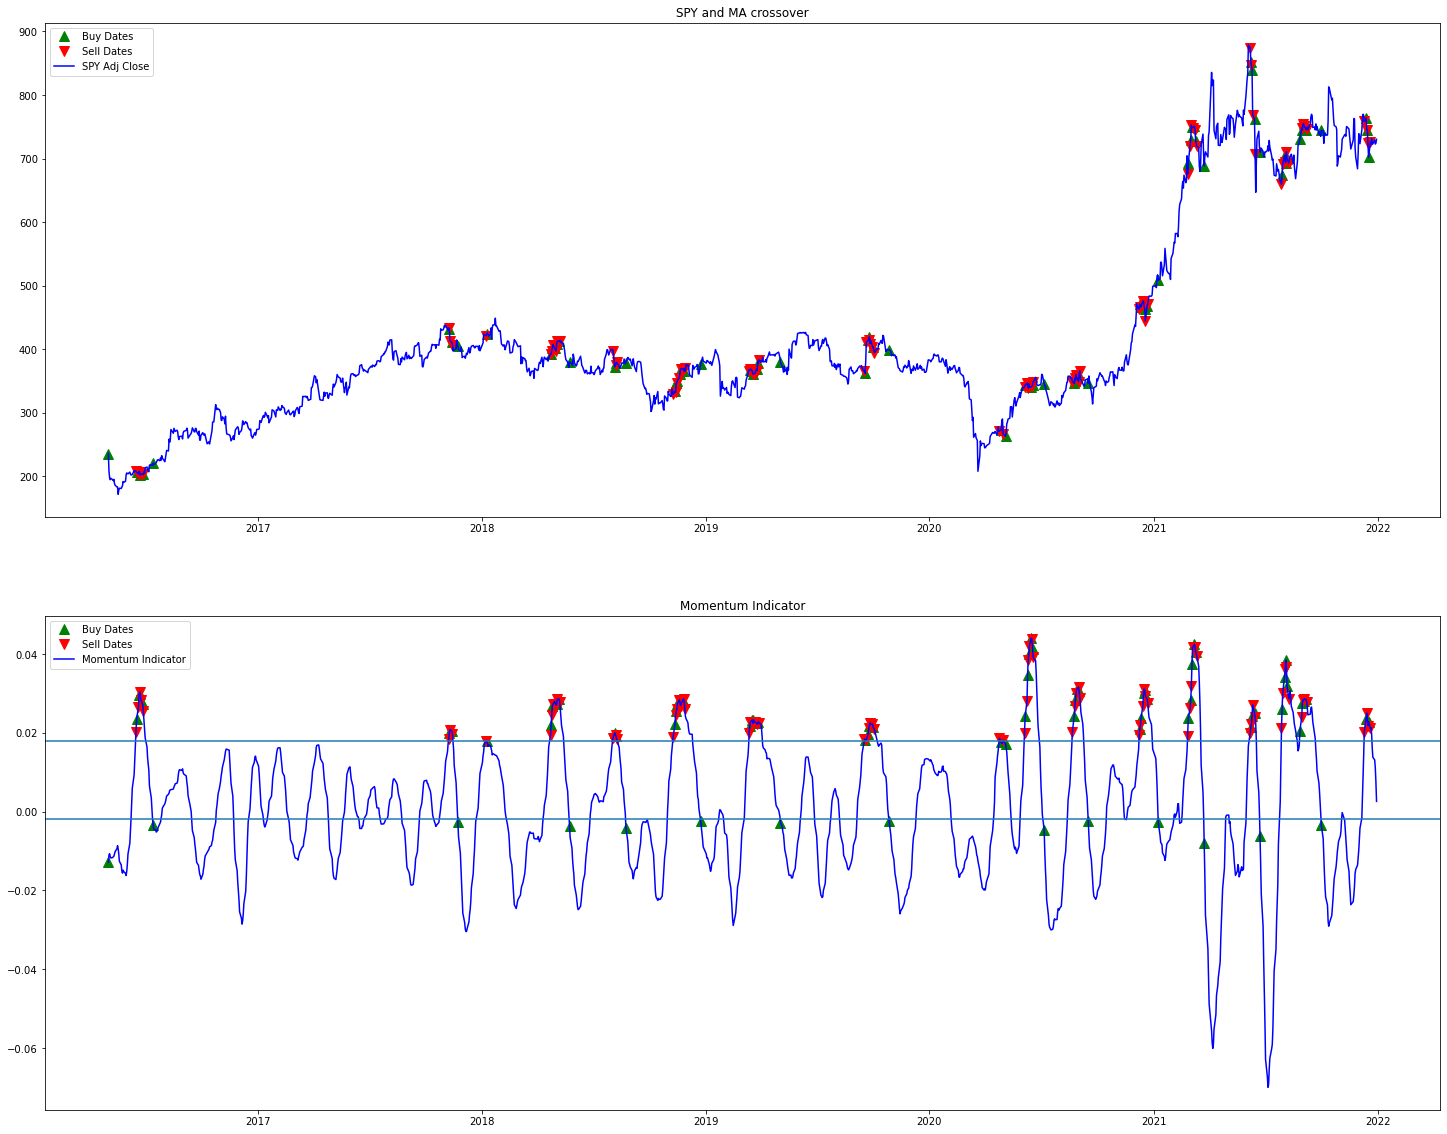

KeyError: 'target_returns'

In [8]:
opt_opt =  momentum_indicator_vix(data_anal, short_threshold=0.018, long_threshold=-0.002, long_ma=9, short_ma=1, plot=True)

df_backtest = data_anal.copy()
df_backtest['target_returns'] = df_backtest['close_target'].pct_change()

# Compute daily returns and cummulative returns of the MA crossover strategy
############# Note: the shift of the signals is crucial to avoid look-ahead bias ###########
opt_opt['m_strat_returns'] = opt_opt['target_returns'] * opt_opt['signals']
opt_opt['m_strat_cumsum'] = 10000 * (1 + opt_opt['m_strat_returns']).cumprod()


In [ ]:
data_anal['combined'].plot()

In [ ]:
strat_opt.head()

In [ ]:
opt_opt.tail()

In [249]:
b_h.head()

,open,high,low,close,volume,close_target,VIX,combined,signals,target_returns,m_strat_returns,m_strat_cumsum,buy_and_hold_strat
2016-05-02,-0.1500,-0.5625,-0.4100,-0.843917,-28561.15,235.50,0.004004,-0.012874,0,NaN,NaN,NaN,NaN
2016-05-03,-0.5925,-0.3900,-0.5000,-0.764250,56804.70,208.25,0.004239,-0.011046,0,-0.115711,-0.0,10000.0,8842.887473
2016-05-04,-0.6750,-0.6750,-1.6975,-0.752500,1056566.65,198.00,0.004362,-0.010687,0,-0.049220,-0.0,10000.0,8407.643312
2016-05-05,-1.9900,-1.9700,-2.2100,-0.796750,761930.70,194.55,0.004523,-0.011412,0,-0.017424,-0.0,10000.0,8261.146497
2016-05-06,-2.2200,-2.1550,-1.6675,-0.805000,540297.10,196.75,0.004325,-0.011775,0,0.011308,0.0,10000.0,8354.564756


In [252]:
opt_opt.head()

,open,high,low,close,volume,close_target,VIX,combined,signals,target_returns,m_strat_returns,m_strat_cumsum
2016-05-02,-0.1500,-0.5625,-0.4100,-0.843917,-28561.15,235.50,0.004004,-0.012874,1,NaN,NaN,NaN
2016-05-03,-0.5925,-0.3900,-0.5000,-0.764250,56804.70,208.25,0.004239,-0.011046,1,-0.115711,-0.115711,8842.887473
2016-05-04,-0.6750,-0.6750,-1.6975,-0.752500,1056566.65,198.00,0.004362,-0.010687,1,-0.049220,-0.049220,8407.643312
2016-05-05,-1.9900,-1.9700,-2.2100,-0.796750,761930.70,194.55,0.004523,-0.011412,1,-0.017424,-0.017424,8261.146497
2016-05-06,-2.2200,-2.1550,-1.6675,-0.805000,540297.10,196.75,0.004325,-0.011775,1,0.011308,0.011308,8354.564756


In [253]:
b_h.head()

,open,high,low,close,volume,close_target,VIX,combined,signals,target_returns,m_strat_returns,m_strat_cumsum,buy_and_hold_strat
2016-05-02,-0.1500,-0.5625,-0.4100,-0.843917,-28561.15,235.50,0.004004,-0.012874,0,NaN,NaN,NaN,NaN
2016-05-03,-0.5925,-0.3900,-0.5000,-0.764250,56804.70,208.25,0.004239,-0.011046,0,-0.115711,-0.0,10000.0,8842.887473
2016-05-04,-0.6750,-0.6750,-1.6975,-0.752500,1056566.65,198.00,0.004362,-0.010687,0,-0.049220,-0.0,10000.0,8407.643312
2016-05-05,-1.9900,-1.9700,-2.2100,-0.796750,761930.70,194.55,0.004523,-0.011412,0,-0.017424,-0.0,10000.0,8261.146497
2016-05-06,-2.2200,-2.1550,-1.6675,-0.805000,540297.10,196.75,0.004325,-0.011775,0,0.011308,0.0,10000.0,8354.564756


In [69]:
df_merge = opt_opt.merge(b_h, left_index=True, right_index=True)

In [85]:
df_merge.tail()

,open_x,high_x,low_x,close_x,volume_x,close_target_x,VIX_x,combined_x,long_ma_x,signals_x,target_returns_x,m_strat_returns_x,m_strat_cumsum_x,signal change_x,open_y,high_y,low_y,close_y,volume_y,close_target_y,VIX_y,combined_y,long_ma_y,signals_y,target_returns_y,m_strat_returns_y,m_strat_cumsum_y,signal change_y,buy_and_hold_strat
2021-12-24,-0.875,-1.5550,-0.0025,0.579250,-163658.85,723.20,0.002183,0.013768,0.020559,-1,0.001107,-0.001107,60990.567290,True,-0.875,-1.5550,-0.0025,0.579250,-163658.85,723.20,0.002183,0.013768,0.016501,-1,0.001107,-0.001107,28768.202511,True,30709.129512
2021-12-27,0.500,0.5725,1.4975,0.566583,-163353.30,729.25,0.001770,0.013101,0.019241,-1,0.008366,-0.008366,60480.344762,True,0.500,0.5725,1.4975,0.566583,-163353.30,729.25,0.001770,0.013101,0.014318,-1,0.008366,-0.008366,28527.539313,True,30966.029724
2021-12-28,1.155,1.3125,2.2900,0.489750,-129330.55,722.75,0.001199,0.010994,0.017849,-1,-0.008913,0.008913,61019.422226,True,1.155,1.3125,2.2900,0.489750,-129330.55,722.75,0.001199,0.010994,0.012621,-1,-0.008913,0.008913,28781.812889,True,30690.021231
2021-12-29,1.700,1.1600,1.8650,0.327417,-159285.45,724.25,0.000869,0.007417,0.016247,-1,0.002075,-0.002075,60892.782125,True,1.700,1.1600,1.8650,0.327417,-159285.45,724.25,0.000869,0.007417,0.010504,-1,0.002075,-0.002075,28722.078929,True,30753.715499
2021-12-30,0.645,-0.8125,0.7075,0.102000,-241205.30,730.30,0.000542,0.002583,0.014002,-1,0.008353,-0.008353,60384.116150,True,0.645,-0.8125,0.7075,0.102000,-241205.30,730.30,0.000542,0.002583,0.006998,-1,0.008353,-0.008353,28482.149930,True,31010.615711


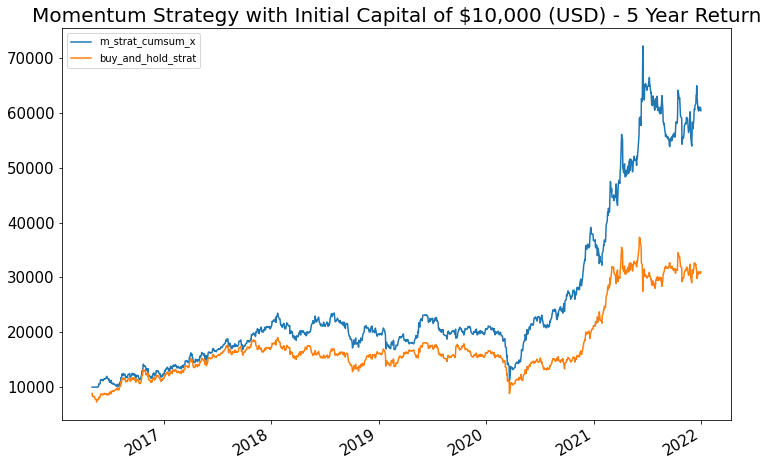

In [140]:
df_merge[['m_strat_cumsum_x', 'buy_and_hold_strat']].plot(figsize=(12,8))
plt.title('Momentum Strategy with Initial Capital of $10,000 (USD) - 5 Year Return', fontsize=20)
plt.yticks(size = 15)
plt.xticks(size = 15)
plt.show()

### Week tasks (done)
- Difference between market price and bulk price
- Filter buy and sell transactions
- Exit signals 
- Optimization on cumulative returns 
- VIX integration

### Next steps
- Optimize the moving average that smooths the VIX and stock price, also their optimal weighting 
- Optimize for the buying signals, instead of both signals, or use sell signals as neutral signals
- Test on multiple stocks prices
- Test on indexes 

### Further next steps
- Apply similar strategy on intraday data
- Apply metalabeling machine learning layer for size positioning and binary approach 

In [122]:
def gen_stats(data, returns, freq=None, window=None, strategy=False):
    
    target_ret = data[returns]
    pfstats = pd.DataFrame(columns=['Strategy'])
                       
    # Mean / std. dev. of return
    ret_m = target_ret.mean()
    ret_s = target_ret.std()
    
    if freq == 'daily':
        ret_ann = (1+ret_m)**252-1
        ret_vol = ret_s*np.sqrt(252)

    if freq == 'weekly':
        ret_ann = (1+ret_m)**52-1
        ret_vol = ret_s*np.sqrt(52)
        
    pfstats.loc['Ann. Return'] = str(round(ret_ann * 100, 1)) + '%'
    pfstats.loc['Ann. Volatility'] = str(round(ret_vol * 100, 1)) + '%'

    # Sharpe
    sharpe = ret_ann/ret_vol
    
    pfstats.loc['Sharpe Ratio (ann.)'] = sharpe.round(2)

    # Maximum Drawdown rolling
    cum_ret = 1000*(1+target_ret).cumprod()-1
    max_dd = cum_ret/cum_ret.rolling(window).max()-1
    max_dd = max_dd.min()


    if freq == 'weekly':
        max_dd_string = str(window)+'-W'
        pfstats.loc['Max. DD ('+max_dd_string+' rolling)'] = str(round(max_dd * 100, 1)) + '%'
 
    # Skewness
    ret_skew = target_ret.skew()
    ret_skew_ann = ret_skew/np.sqrt(252)
    
    pfstats.loc['Skew (ann.)'] = ret_skew_ann.round(2)
        
    return pfstats


In [114]:
df_merge.tail()

,open_x,high_x,low_x,close_x,volume_x,close_target_x,VIX_x,combined_x,long_ma_x,signals_x,target_returns_x,m_strat_returns_x,m_strat_cumsum_x,signal change_x,open_y,high_y,low_y,close_y,volume_y,close_target_y,VIX_y,combined_y,long_ma_y,signals_y,target_returns_y,m_strat_returns_y,m_strat_cumsum_y,signal change_y,buy_and_hold_strat
2021-12-24,-0.875,-1.5550,-0.0025,0.579250,-163658.85,723.20,0.002183,0.013768,0.020559,-1,0.001107,-0.001107,60990.567290,True,-0.875,-1.5550,-0.0025,0.579250,-163658.85,723.20,0.002183,0.013768,0.016501,-1,0.001107,-0.001107,28768.202511,True,30709.129512
2021-12-27,0.500,0.5725,1.4975,0.566583,-163353.30,729.25,0.001770,0.013101,0.019241,-1,0.008366,-0.008366,60480.344762,True,0.500,0.5725,1.4975,0.566583,-163353.30,729.25,0.001770,0.013101,0.014318,-1,0.008366,-0.008366,28527.539313,True,30966.029724
2021-12-28,1.155,1.3125,2.2900,0.489750,-129330.55,722.75,0.001199,0.010994,0.017849,-1,-0.008913,0.008913,61019.422226,True,1.155,1.3125,2.2900,0.489750,-129330.55,722.75,0.001199,0.010994,0.012621,-1,-0.008913,0.008913,28781.812889,True,30690.021231
2021-12-29,1.700,1.1600,1.8650,0.327417,-159285.45,724.25,0.000869,0.007417,0.016247,-1,0.002075,-0.002075,60892.782125,True,1.700,1.1600,1.8650,0.327417,-159285.45,724.25,0.000869,0.007417,0.010504,-1,0.002075,-0.002075,28722.078929,True,30753.715499
2021-12-30,0.645,-0.8125,0.7075,0.102000,-241205.30,730.30,0.000542,0.002583,0.014002,-1,0.008353,-0.008353,60384.116150,True,0.645,-0.8125,0.7075,0.102000,-241205.30,730.30,0.000542,0.002583,0.006998,-1,0.008353,-0.008353,28482.149930,True,31010.615711


In [120]:
df_pct = df_merge[['m_strat_cumsum_x', 'buy_and_hold_strat']].copy()
df_pct = df_pct.pct_change()

In [125]:
ff_stats = gen_stats(df_pct, 'buy_and_hold_strat', freq='daily', window=252)
ff_stats.columns = ['Buy and Hold Strategy']

emlc_stats = gen_stats(df_pct, 'm_strat_cumsum_x', freq='daily', window=252)
emlc_stats.columns = ['Momentum VIX Strategy']

full_stats = pd.concat([ff_stats, emlc_stats], axis=1)
full_stats.fillna('-', inplace=True)

display(full_stats)

,Buy and Hold Strategy,Momentum VIX Strategy
Ann. Return,34.0%,47.6%
Ann. Volatility,36.3%,36.0%
Sharpe Ratio (ann.),0.94,1.32
Skew (ann.),-0.02,-0.02
